# Heart Failure Dataset

### *To Predict Heart Disease*

## Exploratory Data Analysis

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
heart = pd.read_csv('heart.csv')

In [114]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [115]:
heart.shape

(918, 12)

### no need to determine estimates of location

let's divide the data set into heart disease +ve(1) and -ve(0) data sets

## Let's Explore Relationships

In [116]:
positive, negative = [x for _, x in heart.groupby(heart['HeartDisease'] == 0)]
positive.head(2) # data set with +ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [117]:
negative.head(2)  # dataset with -ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


##### for +ve dataset examine the relationship between age groups and occurence of heart disease

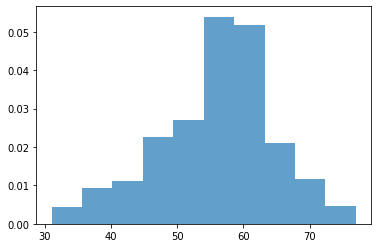

In [118]:
ax = plt.hist(data=positive, bins=10, x='Age', density=1, histtype='bar', alpha=0.7)


<AxesSubplot:ylabel='Frequency'>

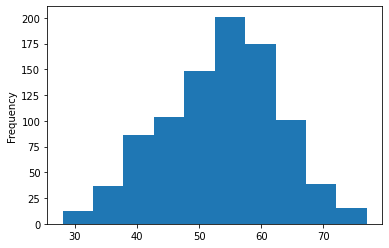

In [119]:
heart['Age'].plot.hist()

the above graph shows that major age group is those of 50s to 70s, the average age of man

let's examine the correlation b/w different features in the mein dataset

<AxesSubplot:>

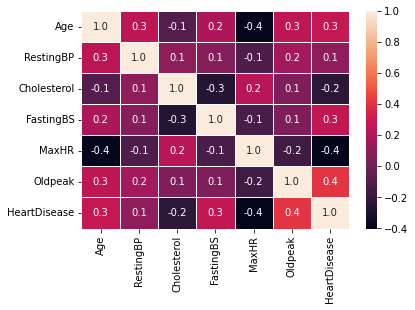

In [120]:
import numpy as np

corr = heart.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,linewidths=.5,fmt=".1f")

the above heatmap represents correlation b/w different features;
- there is a strong -ve correlation b/w Age n MaxHR, MaxHR n HeartDisease, FastingBS n Cholesterol
- there is a medium level -ve correlation b/w Cholesterol n HeartDisease,
- somewhat +ve correlation b/w Oldpeak n HeartDisease, FastingBS n HeartDisease
- there exists no strong +ve correlation

Max-Heart-Rate is an indication for heart activity. So, MaxHR will be counted as symbol rather than as cause of heart disease.

Age and MaxHR do have relation. Their ration may be counted as a sign for a heart disease.

*** There may be a relation b/w Age and Heart Disease, as Age may also be a factor.

Fasting reduces blood sugar and cholesterol level.
+ve sugar in Fasting is also a factor to heart disease. And, cholesterol too.

Normal cholesterol levels are:
- age 19 n below: less than 170 mg/dl
- age 20 n over: 125-200 mg/dl

+ve Fasting blood sugar means diabetes. Diabetes is among major factors of heart diseases.

let's visualize features' relation

### **Normal and Patients**

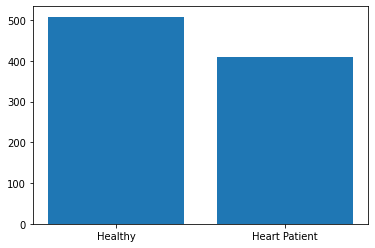

In [121]:
health = heart['HeartDisease']
healthy = {1:'Heart Patient', 0:'Healthy'}
health = health.map(healthy)
ax = plt.bar(data=health, x=health.unique(), height=health.value_counts())

conclusion; in our data set about 400 objects are heart patients

#### Age - MaxHR

MaxHR for an age is calculated as; MaxHR = 220-age
- for moderately intense activity Heart Rate should be 64% - 76% of MaxHR
- for vigorous activity Heart Rate should be 77% - 94% of MaxHR

Le'ts add a 'HeartRatePct' columnn in our dataset

In [122]:
heart['HeartRatePct'] = round((heart['MaxHR'] / (220 - heart['Age']))*100)
heart['HeartRatePct'] = heart['HeartRatePct'].astype('int64')

In [123]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,96
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,91
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,54
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,63
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,73


The HeartRatePct feature adds to out dataset to have a good understanding of Heart.

Let's check how different features are related to +ve heart disease and other features

### ***Analysis***

#### **HeartDisease vs ChestPainType**

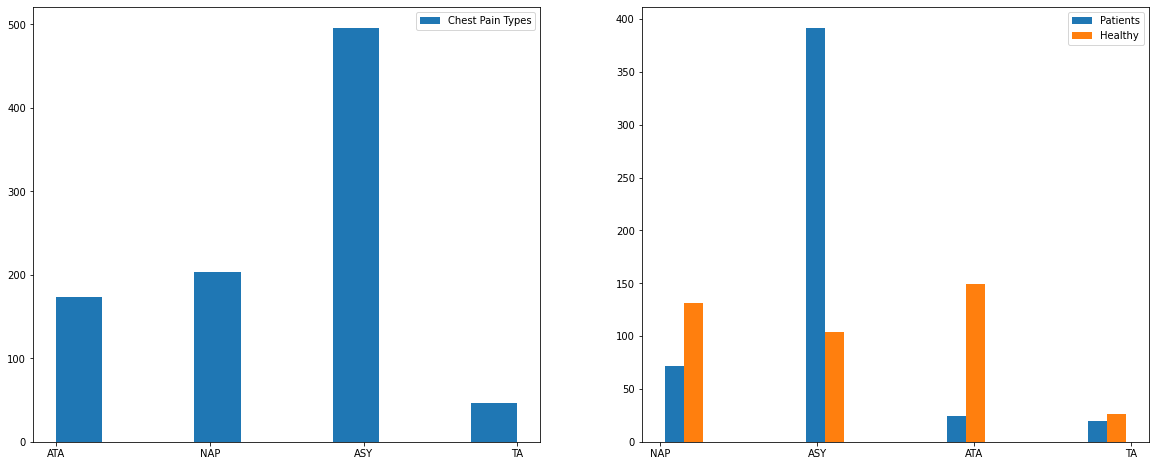

In [152]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[1].hist(
                data=heart, x=[heart[heart['HeartDisease']==1]['ChestPainType'], 
                heart[heart['HeartDisease']==0]['ChestPainType']],
                label=['Patients', 'Healthy']
            )
ax[1].legend()
ax[0].hist(
    data = heart, x='ChestPainType', label = 'Chest Pain Types'
)
ax[0].legend()
# plt.show()

conclusion; Above Graphs show that Chest Pain of type 'ASY' is most common among Heart Patients.

#### **HeartDisease vs RestingBP**

<AxesSubplot:ylabel='Frequency'>

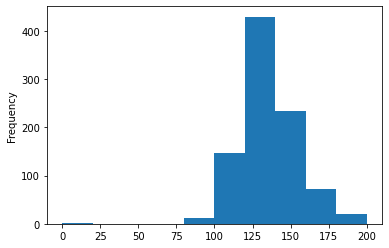

In [154]:
heart['RestingBP'].plot.hist()